<h2> Importing Important Packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

<h2>Importing Dataset that already preprocessed

In [2]:
path_to_file = 'data/padi.csv'
province = 'DI YOGYAKARTA'
sliding_window = 5
train_test_proportion = 0.8

from preprocessing import preprocess

data = pd.read_csv(path_to_file)
preprocessed = preprocess(data[data['Provinsi'] == province],\
                            sliding_window)

preprocessed.head()

/home/cdjodistiara/anaconda3/envs/tf-keras/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,0,1,2,3,4,5
0,644642,643266,642120,661179,647198,621605
1,643266,642120,661179,647198,621605,612393
2,642120,661179,647198,621605,612393,654289
3,661179,647198,621605,612393,654289,661802
4,647198,621605,612393,654289,661802,653577


<h2> Split Dataset into 2 gourp (train and test test)

In [3]:
train_data = preprocessed[:int(train_test_proportion*preprocessed.shape[0])]
test_data = preprocessed.drop(train_data.index)

train_labels = train_data.pop(train_data.columns[-1])
test_labels = test_data.pop(test_data.columns[-1])

<h2> make Modeling function

In [4]:
def build_model():
    model = keras.Sequential([
        layers.Dense(2, activation=tf.nn.relu,
                     input_shape=[len(train_data.keys())]),
        layers.Dense(5, activation=tf.nn.relu),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(loss='mae', optimizer='adam', metrics=['mse'])

    return model

In [5]:
tf.random.set_seed(28)

model = build_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


<h2> Train Regression model 

In [6]:
epochs = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(train_data, train_labels, epochs=epochs, validation_split=0.2, verbose=1, callbacks=[early_stop])

Train on 11 samples, validate on 3 samples
Epoch 1/1000
11/11 [==============================] - 0s 43ms/sample - loss: 651449.8125 - mse: 426737827840.0000 - val_loss: 805865.5000 - val_mse: 649480372224.0000
Epoch 2/1000
11/11 [==============================] - 0s 1ms/sample - loss: 648740.6875 - mse: 423212515328.0000 - val_loss: 802941.7500 - val_mse: 644776198144.0000
Epoch 3/1000
11/11 [==============================] - 0s 1ms/sample - loss: 646011.0625 - mse: 419675537408.0000 - val_loss: 799994.3125 - val_mse: 640051249152.0000
Epoch 4/1000
11/11 [==============================] - 0s 2ms/sample - loss: 643260.8125 - mse: 416126730240.0000 - val_loss: 797022.8125 - val_mse: 635305459712.0000
Epoch 5/1000
11/11 [==============================] - 0s 2ms/sample - loss: 640489.4375 - mse: 412566028288.0000 - val_loss: 794026.9375 - val_mse: 630538436608.0000
Epoch 6/1000
11/11 [==============================] - 0s 1ms/sample - loss: 637696.6250 - mse: 408993202176.0000 - val_loss: 7

Epoch 50/1000
11/11 [==============================] - 0s 1ms/sample - loss: 486551.0938 - mse: 238896758784.0000 - val_loss: 625571.2500 - val_mse: 391378763776.0000
Epoch 51/1000
11/11 [==============================] - 0s 1ms/sample - loss: 482324.1875 - mse: 234796466176.0000 - val_loss: 620906.5625 - val_mse: 385563754496.0000
Epoch 52/1000
11/11 [==============================] - 0s 783us/sample - loss: 478056.2812 - mse: 230692700160.0000 - val_loss: 616195.2500 - val_mse: 379734884352.0000
Epoch 53/1000
11/11 [==============================] - 0s 1ms/sample - loss: 473747.0312 - mse: 226586116096.0000 - val_loss: 611436.9375 - val_mse: 373892874240.0000
Epoch 54/1000
11/11 [==============================] - 0s 1ms/sample - loss: 469396.1875 - mse: 222477565952.0000 - val_loss: 606631.1875 - val_mse: 368038641664.0000
Epoch 55/1000
11/11 [==============================] - 0s 880us/sample - loss: 465003.2812 - mse: 218367737856.0000 - val_loss: 601777.6875 - val_mse: 362173136896

Epoch 99/1000
11/11 [==============================] - 0s 1ms/sample - loss: 224619.0000 - mse: 52320731136.0000 - val_loss: 334702.0000 - val_mse: 112045850624.0000
Epoch 100/1000
11/11 [==============================] - 0s 1ms/sample - loss: 217937.0938 - mse: 49356410880.0000 - val_loss: 327247.3438 - val_mse: 107111260160.0000
Epoch 101/1000
11/11 [==============================] - 0s 971us/sample - loss: 211192.9531 - mse: 46455066624.0000 - val_loss: 319722.0312 - val_mse: 102242639872.0000
Epoch 102/1000
11/11 [==============================] - 0s 1ms/sample - loss: 204385.9531 - mse: 43618955264.0000 - val_loss: 312125.2812 - val_mse: 97442701312.0000
Epoch 103/1000
11/11 [==============================] - 0s 852us/sample - loss: 197515.4375 - mse: 40850358272.0000 - val_loss: 304456.3438 - val_mse: 92714262528.0000
Epoch 104/1000
11/11 [==============================] - 0s 1ms/sample - loss: 190580.7656 - mse: 38151688192.0000 - val_loss: 296714.5625 - val_mse: 88060239872.000

Epoch 149/1000
11/11 [==============================] - 0s 1ms/sample - loss: 32113.5508 - mse: 1652592256.0000 - val_loss: 91631.8750 - val_mse: 8433244672.0000
Epoch 150/1000
11/11 [==============================] - 0s 2ms/sample - loss: 31900.3242 - mse: 1641902976.0000 - val_loss: 94125.8984 - val_mse: 8896177152.0000
Epoch 151/1000
11/11 [==============================] - 0s 896us/sample - loss: 31707.4082 - mse: 1642318592.0000 - val_loss: 96472.3359 - val_mse: 9343078400.0000
Epoch 152/1000
11/11 [==============================] - 0s 1ms/sample - loss: 31525.7949 - mse: 1651938816.0000 - val_loss: 98685.8359 - val_mse: 9774756864.0000
Epoch 153/1000
11/11 [==============================] - 0s 713us/sample - loss: 31354.3750 - mse: 1669224960.0000 - val_loss: 100779.7109 - val_mse: 10192131072.0000
Epoch 154/1000
11/11 [==============================] - 0s 1ms/sample - loss: 31192.1074 - mse: 1692912768.0000 - val_loss: 102765.8359 - val_mse: 10596134912.0000
Epoch 155/1000
11/11

Epoch 199/1000
11/11 [==============================] - 0s 1ms/sample - loss: 30951.0059 - mse: 1792588160.0000 - val_loss: 106264.0391 - val_mse: 11327614976.0000
Epoch 200/1000
11/11 [==============================] - 0s 1ms/sample - loss: 30940.6309 - mse: 1789999616.0000 - val_loss: 106035.6641 - val_mse: 11279180800.0000
Epoch 201/1000
11/11 [==============================] - 0s 904us/sample - loss: 30921.0000 - mse: 1785010048.0000 - val_loss: 105707.1250 - val_mse: 11209677824.0000
Epoch 202/1000
11/11 [==============================] - 0s 1ms/sample - loss: 30892.9609 - mse: 1777958400.0000 - val_loss: 105287.6484 - val_mse: 11121246208.0000
Epoch 203/1000
11/11 [==============================] - 0s 673us/sample - loss: 30857.3691 - mse: 1769201536.0000 - val_loss: 104785.7109 - val_mse: 11015890944.0000
Epoch 204/1000
11/11 [==============================] - 0s 870us/sample - loss: 30831.5859 - mse: 1759084928.0000 - val_loss: 104446.1250 - val_mse: 10944905216.0000
Epoch 205/

<h2> Plotting Training Process

In [7]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

#Show last Epoch matrics result
hist.tail()

,loss,mse,val_loss,val_mse,epoch
232,30807.205078,1.761958e+09,104742.289062,1.100739e+10,232
233,30798.419922,1.758943e+09,104727.585938,1.100433e+10,233
234,30798.289062,1.758675e+09,104836.898438,1.102724e+10,234
235,30800.642578,1.760886e+09,104801.601562,1.101987e+10,235
236,30797.085938,1.760204e+09,104635.601562,1.098515e+10,236


In [8]:
def ploting_history(history):

    plt.figure(figsize=(14,8))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error (Target)')
    plt.plot(hist['epoch'], hist['loss'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Error')
    plt.legend()
    # plt.ylim([0, 5])

    plt.figure(figsize=(14,8))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error (Target^2)')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
    plt.legend()
    # plt.ylim([0, 20])

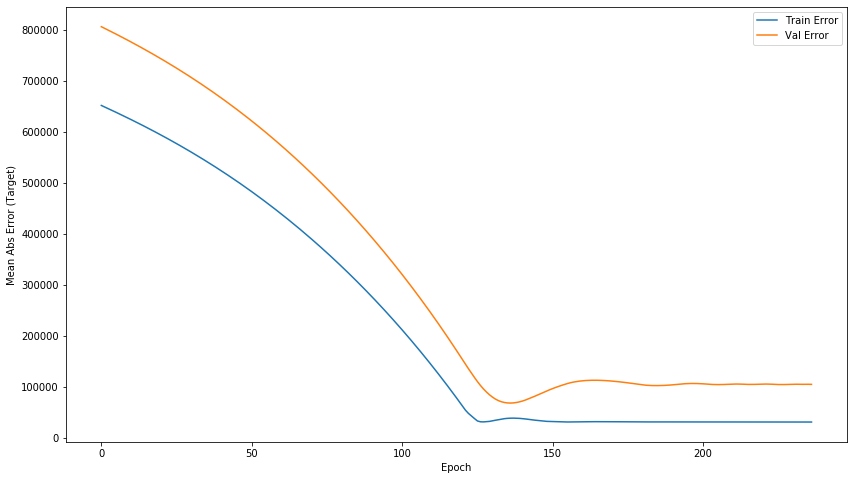

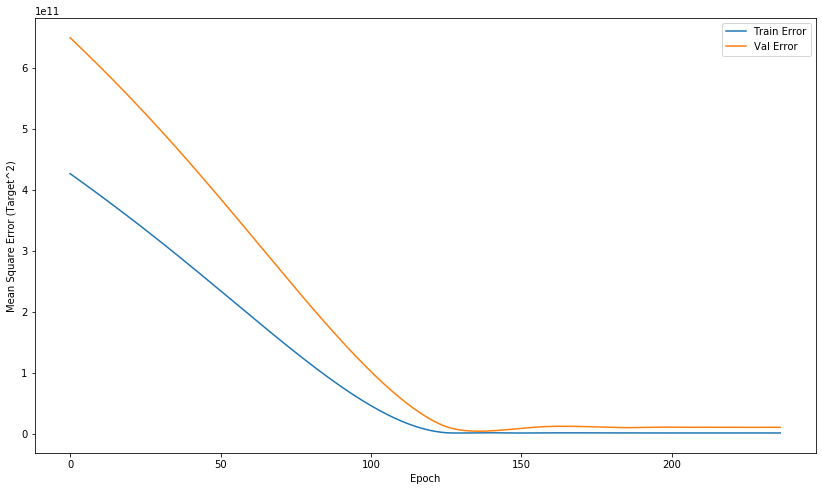

In [9]:
ploting_history(history)

<h2> Checking Evaluation metrics model

In [10]:
model.evaluate(test_data, test_labels, verbose=0)
#     print("Test Set Mean Abs Error : {:5.2f} Comodity in ton".format(mae))

[89869.0, 9863504000.0]

<h2> Predicting Test data

In [11]:
predict = model.predict(test_data).flatten()

predict = pd.DataFrame(list(zip(predict, test_labels.tolist())), 
               columns =['Prediction','Actual'])

predict['error'] = (abs(predict['Actual'] - predict['Prediction'])/
                               predict['Prediction'])
predict

,Prediction,Actual,error
0,783822.8750,946224,0.207191
1,861007.8125,921824,0.070634
2,858445.9375,919573,0.071207
3,870004.3750,945136,0.086358


In [12]:
print(predict.error.mean())

0.10884730846631764


In [13]:
loss, mse = model.evaluate(test_data, test_labels, verbose=0)
print("Mean Absolute Error : {:5.2f} Comodity in ton".format(loss))
print("Mean Squared Error : {:5.2f} Comodity in ton".format(mse))
print(predict.error.mean())

Mean Absolute Error : 89869.00 Comodity in ton
Mean Squared Error : 9863503872.00 Comodity in ton
0.10884730846631764
